In [3]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
df = pandas.read_csv(r"C:\Users\ballc\OneDrive\Documents\Desktop\data analytics week 10\Real_Estate_Sales_2001-2022_GL.csv", low_memory = False)

In [5]:
#Question 1:
#This dataset contains over 800,000 rows about real estate sales from 2001-2022. It has column headings like List Year Town Address Assessed Value Sale Amount Property Type Residential Type, that
#are similar to datasets we have covered when learning about regression analysis. It has predictor variables, a good target variable, and plenty of data to accurately predict.
#My prediction goal is to estimate the future cost of houses by using the predictor variables mentioned above

In [6]:
#Question 2

#predictor variables: Town, Date Recorded, List Year, Sales Ratio
#target variable: Sale Amount
#drop unwanted columns that have many n/a/null and duplicate values before removing n/a/null and duplicate values so dataset does not shrink so much

In [7]:
unwanted_features = ['Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Location', 'Serial Number', 'Address', 'Date Recorded']


In [8]:
df = df.drop(columns = unwanted_features)


In [9]:
print(df)

         List Year          Town  Assessed Value  Sale Amount  Sales Ratio  \
0             2020       Ansonia        133000.0     248400.0       0.5354   
1             2020       Ansonia        110500.0     239900.0       0.4606   
2             2020       Ansonia        150500.0     325000.0       0.4630   
3             2020       Ansonia        127400.0     202500.0       0.6291   
4             2020          Avon        217640.0     400000.0       0.5441   
...            ...           ...             ...          ...          ...   
1097624       2022      Stamford        483380.0     865000.0       0.5588   
1097625       2022  Wethersfield         20650.0     760857.0       0.0271   
1097626       2022      Stamford        132900.0     220000.0       0.6040   
1097627       2022  Old Saybrook       1099400.0    1575000.0       0.6980   
1097628       2022   Southington        135860.0     330000.0       0.4117   

        Property Type Residential Type  
0         Residential 

In [10]:
#drop na
print(f"[!] Size of dataset before dropping na and duplicate values: {df.size}")
df = df.dropna()

[!] Size of dataset before dropping na and duplicate values: 7683403


In [11]:
#drop duplicates
df = df.drop_duplicates()

print(f"[!] Size of dataset after dropping na and duplicate values: {df.size}")

[!] Size of dataset after dropping na and duplicate values: 4833248


In [12]:
#boxplot to identify outliers
numeric_cols = ['Assessed Value', 'List Year', 'Sales Ratio']

In [16]:
fig = plt.figure(figsize = (10, 8))


<Figure size 1000x800 with 0 Axes>

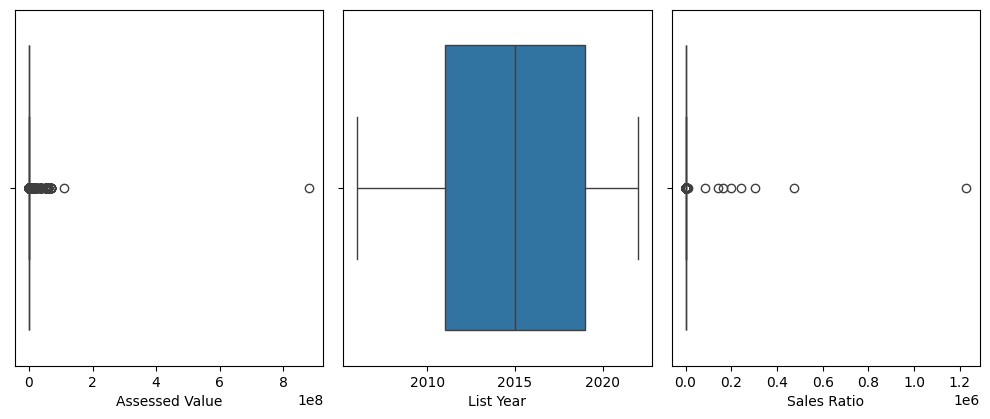

In [18]:
fig = plt.figure(figsize=(10, 8))
for i in range(len(numeric_cols)):
    column = numeric_cols[i]
    sub = fig.add_subplot(2, 3, i + 1)
    sns.boxplot(x=column, data=df)
plt.tight_layout()  # Adjust layout
plt.show()  

In [19]:
#tight_layout is needed on Jupyter

In [20]:
#q1 = .25
#q2 = .50
#q3 = .75
#q4 = 1.00
q1 = df[numeric_cols].quantile(0.25)
q3 = df[numeric_cols].quantile(0.75)
iqr = q3 - q1

In [21]:
#define outlier thresholds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [22]:
print(lower_bound)

Assessed Value   -95100.000000
List Year          1999.000000
Sales Ratio           0.167163
dtype: float64


In [23]:
print(upper_bound)

Assessed Value    454180.000000
List Year           2031.000000
Sales Ratio            1.197395
dtype: float64


In [24]:
#create a boolean mask for rows without outliers
mask = (df[numeric_cols] >= lower_bound) & (df[numeric_cols] <= upper_bound)

In [25]:
#keep only rows without outliers
df = df[mask.all(axis = 1)]

In [26]:
print("DF without outliers: ")
print(df)

DF without outliers: 
         List Year         Town  Assessed Value  Sale Amount  Sales Ratio  \
0             2020      Ansonia        133000.0     248400.0     0.535400   
1             2020      Ansonia        110500.0     239900.0     0.460600   
3             2020      Ansonia        127400.0     202500.0     0.629100   
4             2020         Avon        217640.0     400000.0     0.544100   
6             2020  Barkhamsted        203530.0     415000.0     0.490434   
...            ...          ...             ...          ...          ...   
1097620       2022    Waterbury         57178.0     105000.0     0.544500   
1097621       2022      Windham         92250.0     265000.0     0.348100   
1097622       2022     Stamford        183890.0     340000.0     0.540800   
1097623       2022      Norwalk        274580.0     803000.0     0.341900   
1097628       2022  Southington        135860.0     330000.0     0.411700   

        Property Type Residential Type  
0         Re

In [27]:
#convert categorical into numerical
property_unique = df['Property Type'].unique()
residential_unique = df['Residential Type'].unique()

In [28]:
mapping = {value: i for i, value in enumerate(property_unique)}
df['Property Type'] = df['Property Type'].map(mapping)
mapping = {value: i for i, value in enumerate(residential_unique)}
df['Residential Type'] = df['Residential Type'].map(mapping)

In [29]:
#inconsistent values: Chattanooga != CHATTAnooga etc
df['Town'] = df['Town'].str.lower().str.strip()

In [30]:
encoder = OneHotEncoder(sparse_output = False)

In [31]:
#One-Hot encoding is similar to converting categorical features into numerical but seperates them out into columns instead of just replacing the values.

In [32]:
#In this case, it was useful to use it for the Town column because although the values were fixed, there are many of them, and it is compatible with a numerical setup like the Anova Test.

In [33]:
# Fit and transform the 'Town' column
encoded_town = encoder.fit_transform(df[['Town']])
encoded_town_df = pandas.DataFrame(encoded_town, columns=encoder.get_feature_names_out(), index = df.index)

# Join the encoded columns to the original DataFrame and drop the 'Town' column
df = df.join(encoded_town_df).drop(columns = ['Town'])

print("DataFrame After One-Hot Encoding:")
print(df.head())

DataFrame After One-Hot Encoding:
   List Year  Assessed Value  Sale Amount  Sales Ratio  Property Type  \
0       2020        133000.0     248400.0     0.535400              0   
1       2020        110500.0     239900.0     0.460600              0   
3       2020        127400.0     202500.0     0.629100              0   
4       2020        217640.0     400000.0     0.544100              0   
6       2020        203530.0     415000.0     0.490434              0   

   Residential Type  Town_***unknown***  Town_andover  Town_ansonia  \
0                 0                 0.0           0.0           1.0   
1                 1                 0.0           0.0           1.0   
3                 2                 0.0           0.0           1.0   
4                 0                 0.0           0.0           0.0   
6                 0                 0.0           0.0           0.0   

   Town_ashford  ...  Town_willington  Town_wilton  Town_winchester  \
0           0.0  ...         

In [34]:
#Question 3

#feature scaling

scaler = StandardScaler()

In [35]:
df[['Assessed Value', 'Sales Ratio']] = scaler.fit_transform(df[['Assessed Value', 'Sales Ratio']])


In [36]:
#ANOVA Test setup & execution


In [37]:
x = df.drop(columns = ['Sale Amount'])
y = df['Sale Amount']

In [38]:
f_scores, p_values = f_classif(x, y)

In [39]:
#display p-values
for feature, p_val in zip(x.columns, p_values):
    print(f'feature: {feature}, p-value: {p_val}')

feature: List Year, p-value: 0.0
feature: Assessed Value, p-value: 0.0
feature: Sales Ratio, p-value: 0.0
feature: Property Type, p-value: 0.0
feature: Residential Type, p-value: 0.0
feature: Town_***unknown***, p-value: 0.0
feature: Town_andover, p-value: 6.894430248049314e-250
feature: Town_ansonia, p-value: 0.9999999999999999
feature: Town_ashford, p-value: 0.9999999999999999
feature: Town_avon, p-value: 0.9999999999999999
feature: Town_barkhamsted, p-value: 0.9999999999999999
feature: Town_beacon falls, p-value: 1.148233202798016e-258
feature: Town_berlin, p-value: 1.0656284359908386e-41
feature: Town_bethany, p-value: 0.9999999999999999
feature: Town_bethel, p-value: 0.0
feature: Town_bethlehem, p-value: 1.8024680396048197e-125
feature: Town_bloomfield, p-value: 3.1143927611852214e-13
feature: Town_bolton, p-value: 0.9999999999999999
feature: Town_bozrah, p-value: 0.9999999999999999
feature: Town_branford, p-value: 0.9999999737300526
feature: Town_bridgeport, p-value: 2.4721485116

In [40]:
#there are multiple unrelated features here, remove them now

In [41]:
significant_features = [feature for feature, p_val in zip(x.columns, p_values) if p_val < 0.05]
x_significant = x[significant_features]

In [42]:
#Question 4


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_significant, y, test_size = 0.2, random_state = 42)


In [44]:
model = LinearRegression()

In [45]:
#cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv = 10)

In [46]:
#train
model.fit(x_train, y_train)

LinearRegression()

In [47]:
#predict & evaluate
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

In [48]:
for actual, predicted in zip(y_test[:5], y_pred[:5]):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual: 312371.0, Predicted: 382215.85065459786
Actual: 285000.0, Predicted: 295048.1037694014
Actual: 112500.0, Predicted: 124460.36475173547
Actual: 26000.0, Predicted: -56740.67663472489
Actual: 200000.0, Predicted: 191188.34564437787


In [49]:
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.9056681587237484
Mean Squared Error: 2295230040.094677
